<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [34]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [3]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [31]:
df_copy = df.copy()

#We will drop missing values
df_copy = df_copy.dropna(subset=['Employment', 'JobSat', 'RemoteWork'])
df_copy.shape

(29117, 114)

#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [32]:
print(df_copy['JobSat'].value_counts())
print(df_copy['YearsCodePro'].value_counts())

JobSat
8.0     7506
7.0     6376
6.0     3751
9.0     3624
10.0    2250
5.0     1956
3.0     1165
4.0     1130
2.0      772
0.0      311
1.0      276
Name: count, dtype: int64
YearsCodePro
3                     2261
2                     2151
5                     2016
10                    1918
4                     1866
6                     1725
8                     1588
7                     1533
1                     1173
12                    1111
9                      973
15                     935
20                     818
11                     806
Less than 1 year       779
13                     703
14                     628
16                     577
18                     526
25                     504
17                     481
24                     343
30                     318
19                     312
22                     275
23                     258
26                     243
21                     216
27                     212
28                     170
3

/tmp/ipykernel_301/2089383815.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_job_sat = df_exp.groupby('ExperienceRange')['JobSat'].median().reset_index()


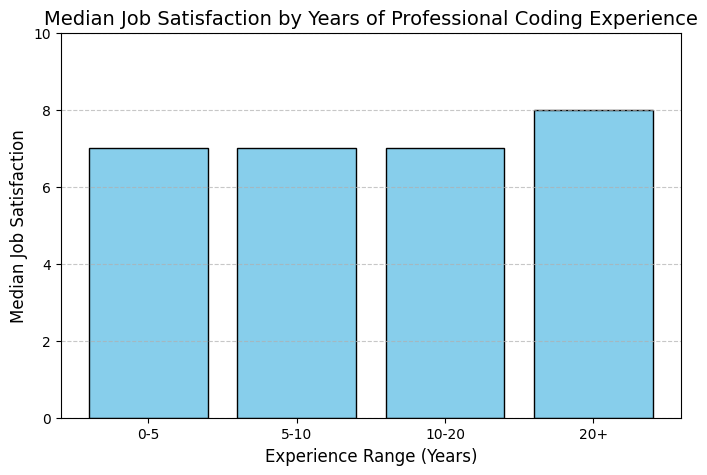

In [36]:
# Remove rows with missing YearsCodePro or JobSat
df_exp = df_copy.dropna(subset=['YearsCodePro', 'JobSat']).copy()

# Convert text to numeric
df_exp['YearsCodePro'] = df_exp['YearsCodePro'].replace({
    'Less than 1 year': 0,
    'More than 50 years': 51
})
df_exp['YearsCodePro'] = pd.to_numeric(df_exp['YearsCodePro'], errors='coerce')

# Create experience ranges
bins = [0, 5, 10, 20, np.inf]
labels = ['0-5', '5-10', '10-20', '20+']
df_exp['ExperienceRange'] = pd.cut(df_exp['YearsCodePro'], bins=bins, labels=labels, right=False)

# Calculate median JobSat for each range
median_job_sat = df_exp.groupby('ExperienceRange')['JobSat'].median().reset_index()

# Plot
plt.figure(figsize=(8,5))
plt.bar(median_job_sat['ExperienceRange'], median_job_sat['JobSat'], color='skyblue', edgecolor='black')
plt.title('Median Job Satisfaction by Years of Professional Coding Experience', fontsize=14)
plt.xlabel('Experience Range (Years)', fontsize=12)
plt.ylabel('Median Job Satisfaction', fontsize=12)
plt.ylim(0, 10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


/tmp/ipykernel_301/2732021489.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_copy, x='JobSat', palette='viridis')


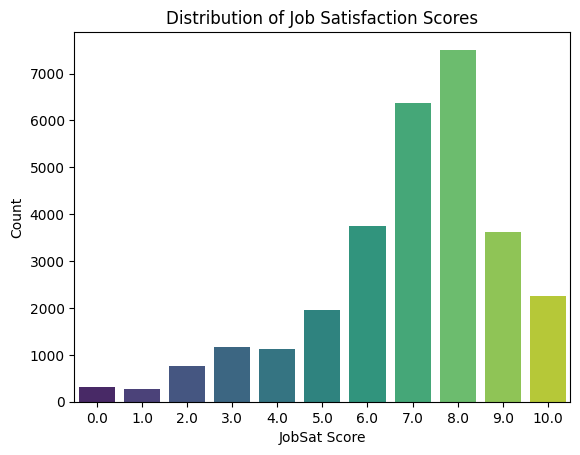

In [37]:
df_copy = df.copy()
df_copy = df_copy.dropna(subset = ['JobSat'])
sns.countplot(data=df_copy, x='JobSat', palette='viridis')
plt.title('Distribution of Job Satisfaction Scores')
plt.xlabel('JobSat Score')
plt.ylabel('Count')
plt.show()


#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


/tmp/ipykernel_301/3536411439.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_remote, x='RemoteWork', palette='viridis')


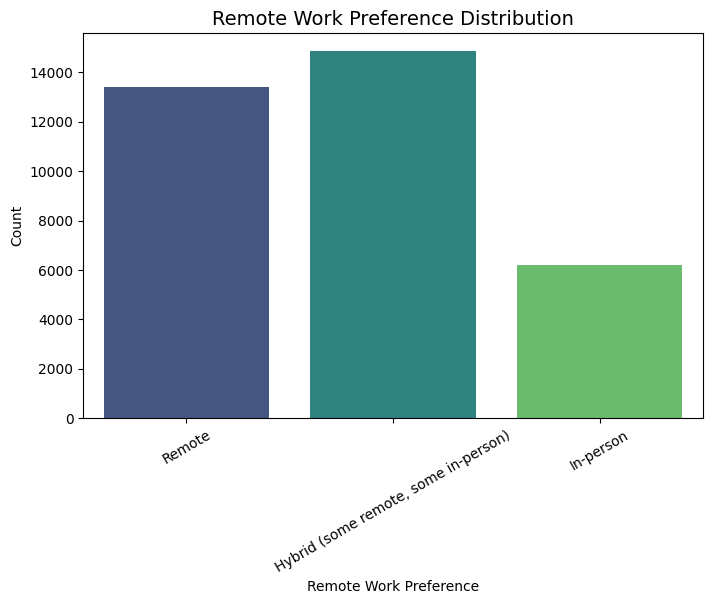

RemoteWork                                          Hybrid (some remote, some in-person)  \
EmploymentClean                                                                            
Employed, full-time                                                                11436   
Employed, part-time                                                                  903   
Independent contractor, freelancer, or self-emp...                                  1522   
Not employed, and not looking for work                                                 4   
Not employed, but looking for work                                                    41   
Retired                                                                               12   
Student, full-time                                                                   502   
Student, part-time                                                                   426   

RemoteWork                                          In-person  Remote  
Employm

In [41]:
# Copy dataframe and remove missing RemoteWork or Employment
df_remote = df_copy.dropna(subset=['RemoteWork', 'Employment']).copy()

# Split and explode Employment so each role gets its own row
df_remote['EmploymentClean'] = df_remote['Employment'].str.split(';')
df_remote = df_remote.explode('EmploymentClean')

# Remove leading/trailing spaces
df_remote['EmploymentClean'] = df_remote['EmploymentClean'].str.strip()


plt.figure(figsize=(8,5))
sns.countplot(data=df_remote, x='RemoteWork', palette='viridis')
plt.title('Remote Work Preference Distribution', fontsize=14)
plt.xlabel('Remote Work Preference')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.show()



remote_crosstab = pd.crosstab(df_remote['EmploymentClean'], df_remote['RemoteWork'])
print(remote_crosstab)


#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


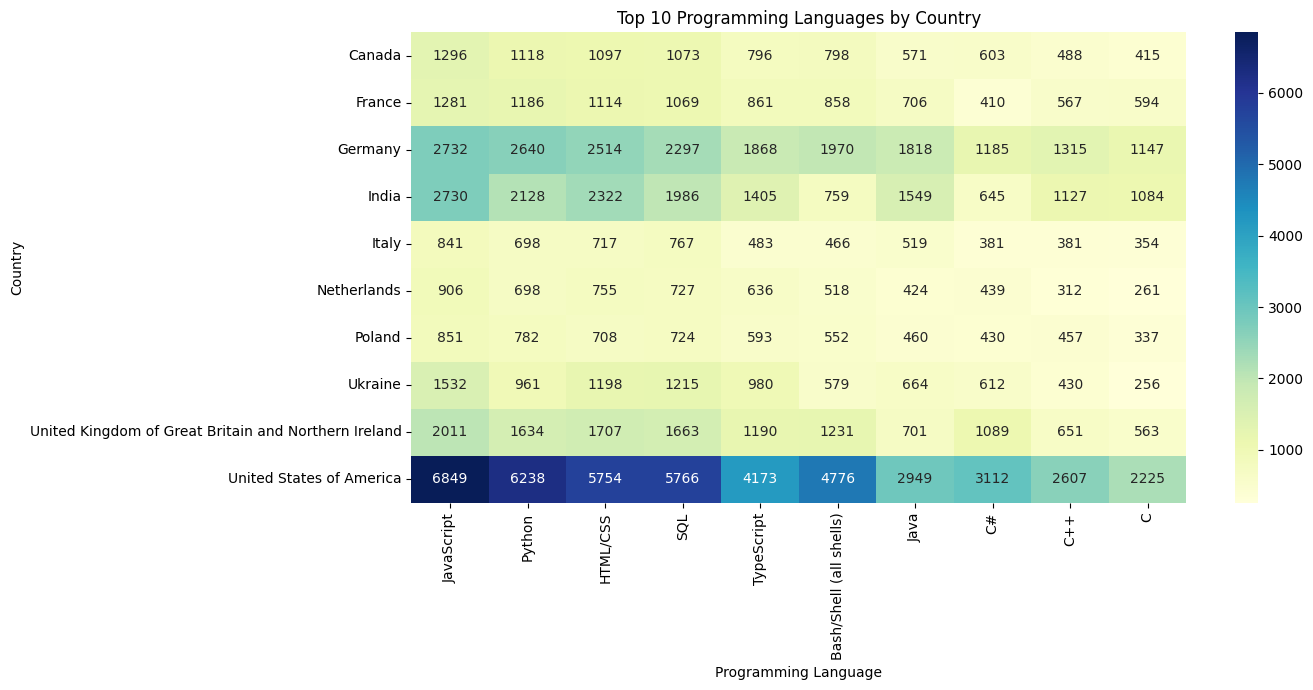

In [51]:
## Write your code here
df_lang = df[['Country', 'LanguageHaveWorkedWith']].dropna()
# Convert semi-colon separated strings into lists
df_lang['LanguageHaveWorkedWithClean'] = df_lang['LanguageHaveWorkedWith'].str.split(';')

# Explode so each language gets its own row
df_lang = df_lang.explode('LanguageHaveWorkedWithClean')
# Filter top 5 countries by response count (or manually choose)
top_countries = df_lang['Country'].value_counts().head(10).index
df_lang = df_lang[df_lang['Country'].isin(top_countries)]
lang_region_table = pd.crosstab(df_lang['Country'], df_lang['LanguageHaveWorkedWithClean'])
# Choose top 10 languages across all countries
top_languages = lang_region_table.sum().sort_values(ascending=False).head(10).index
lang_region_top = lang_region_table[top_languages]



plt.figure(figsize=(14, 7))
sns.heatmap(lang_region_top, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Top 10 Programming Languages by Country")
plt.xlabel("Programming Language")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


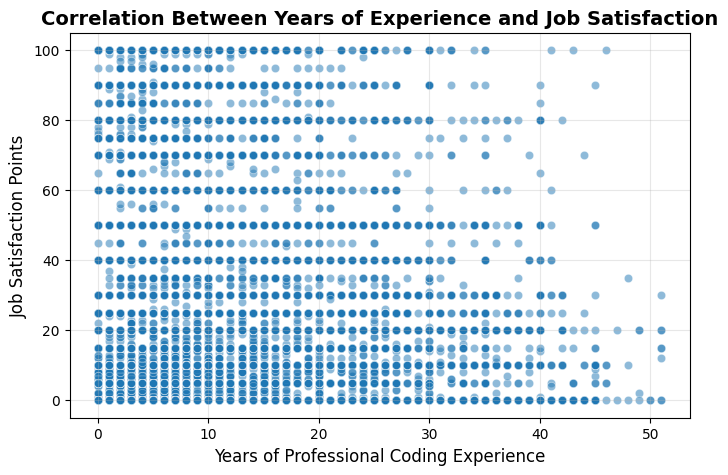

In [55]:
# Copy relevant columns and drop missing values
df_copy = df.copy()
df_corr = df_copy[['YearsCodePro', 'JobSatPoints_1']].dropna().copy()

# Convert text to numeric
df_corr['YearsCodePro'] = df_corr['YearsCodePro'].replace({
    'Less than 1 year': 0,
    'More than 50 years': 51
})
df_corr['YearsCodePro'] = pd.to_numeric(df_corr['YearsCodePro'], errors='coerce')

# Drop any remaining NaNs
df_corr = df_corr.dropna(subset=['YearsCodePro', 'JobSatPoints_1'])

plt.figure(figsize=(8,5))
sns.scatterplot(data=df_corr, x='YearsCodePro', y='JobSatPoints_1', alpha=0.5)
plt.title('Correlation Between Years of Experience and Job Satisfaction', fontsize=14, fontweight='bold')
plt.xlabel('Years of Professional Coding Experience', fontsize=12)
plt.ylabel('Job Satisfaction Points', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


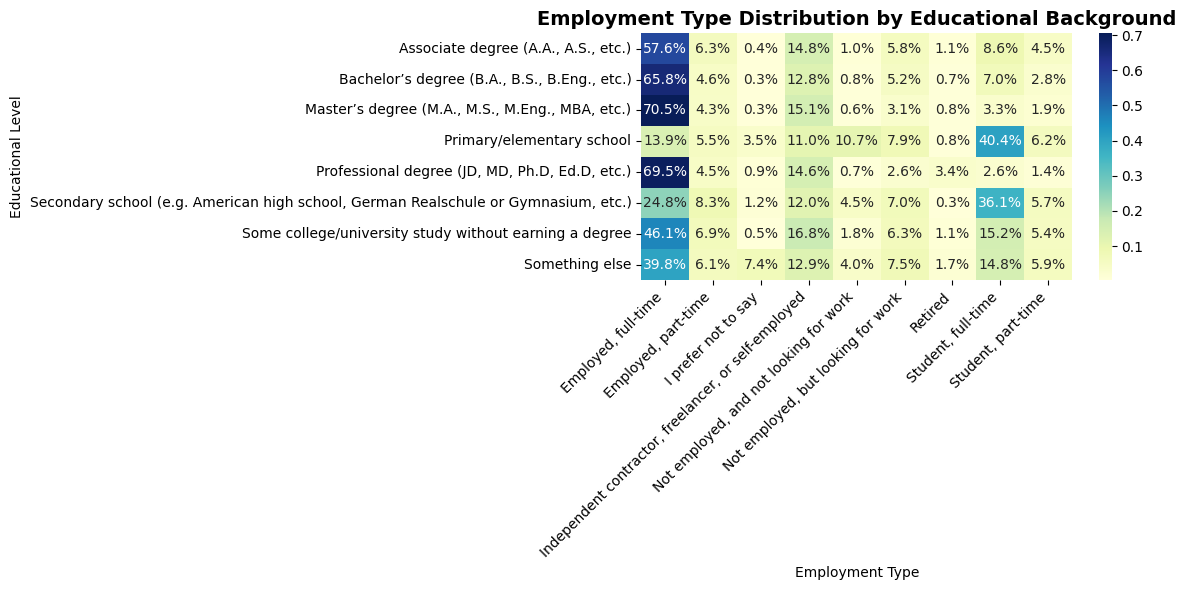

In [60]:
## Write your code here

#Split Semicolon-Separated Employment Types

df_expanded = df.copy()
df_expanded['Employment'] = df_expanded['Employment'].str.split(';')
df_expanded = df_expanded.explode('Employment')

#Clean and Drop Missing Values

df_expanded = df_expanded[['EdLevel', 'Employment']].dropna()
df_expanded['Employment'] = df_expanded['Employment'].str.strip()
df_expanded['EdLevel'] = df_expanded['EdLevel'].str.strip()

#Create Cross-Tabulation

edu_emp_ct = pd.crosstab(df_expanded['EdLevel'], df_expanded['Employment'], normalize='index')  # row-wise percentages

#Visualize with Heatmap

plt.figure(figsize=(12, 6))
sns.heatmap(edu_emp_ct, annot=True, fmt=".1%", cmap="YlGnBu")
plt.title('Employment Type Distribution by Educational Background', fontsize=14, fontweight='bold')
plt.xlabel('Employment Type')
plt.ylabel('Educational Level')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
